#8. Séries Temporais

## 8.1. Objetivo da análise de séries temporais


- Descrever o comportamento da série;

- Encontrar periodicidades;

- Obter possíveis explicações para o comportamento da série, geralmente através de variáveis auxiliares;

- Predizer o comportamento futuro, o que possiibilita  fazer planos a longo, médio ou curto prazo e tomar decisões apropriadas.

## 8.2. Trabalhando com datas no Pandas 

In [86]:
import pandas as pd

df=pd.read_csv('/content/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


### Muitas vezes lidamos com datasets onde as datas não estão no formato datetime.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


### Transformando para tipo datetime

In [88]:
df['Month'] = pd.to_datetime(df['Month'])

### Para poder trabalhar melhor com os dados, é importante fazer com que a coluna dos meses se transforme no Index.

In [89]:
df = df.set_index('Month')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


Quando o índice é do tipo datetime, podemos executar facilmente filtros de datas, por exemplo.

In [96]:
df.loc['1957-01':'1958-04']

,Monthly beer production
Month,
1957-01-01,95.9
1957-02-01,82.8
1957-03-01,83.3
1957-04-01,80.0
1957-05-01,80.4
1957-06-01,67.5
1957-07-01,75.7
1957-08-01,71.1
1957-09-01,89.3


### Podemos agrupar os dados:

In [105]:
df.groupby(df.index.year)['Monthly beer production'].mean()

Month
1956     86.041667
1957     87.200000
1958     87.925000
1959     87.700000
1960     90.366667
1961     93.641667
1962     95.366667
1963     99.116667
1964    104.650000
1965    109.216667
1966    111.150000
1967    116.550000
1968    123.433333
1969    126.833333
1970    131.966667
1971    137.083333
1972    141.233333
1973    153.141667
1974    159.575000
1975    161.683333
1976    161.975000
1977    163.391667
1978    166.525000
1979    162.350000
1980    160.925000
1981    169.241667
1982    165.058333
1983    154.133333
1984    154.258333
1985    154.758333
1986    154.133333
1987    156.383333
1988    163.166667
1989    160.208333
1990    163.208333
1991    158.258333
1992    150.416667
1993    147.916667
1994    148.000000
1995    138.250000
Name: Monthly beer production, dtype: float64

Para utilizarmos as funções de decomposição, iremos também definir a frequência dos dados.

In [74]:
df = df.asfreq('MS') # MS indica a frequência como mensal
df.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq='MS')

### Período dos dados:

In [97]:
df.index.min()

Timestamp('1956-01-01 00:00:00')

In [98]:
df.index.max()

Timestamp('1995-08-01 00:00:00')

In [104]:
df.index.max() - df.index.min()

Timedelta('14457 days 00:00:00')

### Gráfico dos dados:

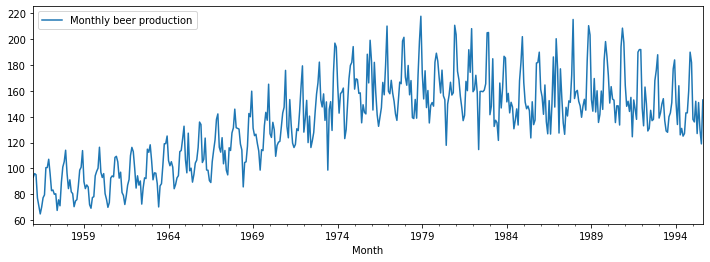

In [95]:
df.plot(figsize=(12, 4))
plt.show()


## 8.3. Decomposição

Uma série temporal pode ser decomposta nos seguintes componentes:

- **Tendência (\\(T\\))**: indica o seu comportamento ao longo do tempo, ou seja, se é crescente, decrescente ou estável. Além disso indica a velocidade destas mudanças. 

<br>



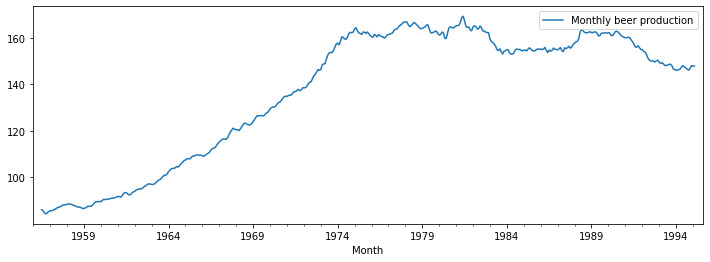

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
decomp = seasonal_decompose(df)
decomp.trend.plot(figsize=(12, 4))
plt.show()

<br>

- **Sazonalidade (\\(S\\))**: são oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. Os movimentos facilmente previsíveis, ocorrendo em intervalos regulares de tempo. A partir da sazonalidade pode-se classificar uma série temporal em aditiva ou multiplicativa. Uma **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo. A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**.



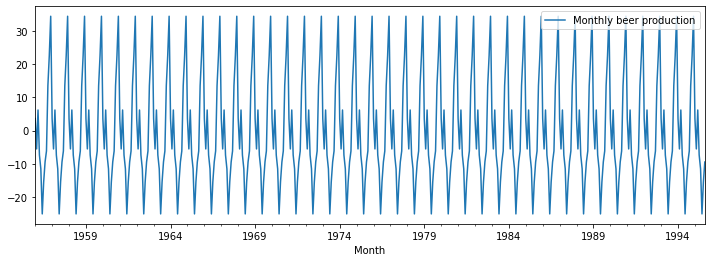

In [99]:
decomp.seasonal.plot(figsize=(12, 4))
plt.show()

<br>

- **Ruído Aleatório (\\(\epsilon\\))**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.
<br>



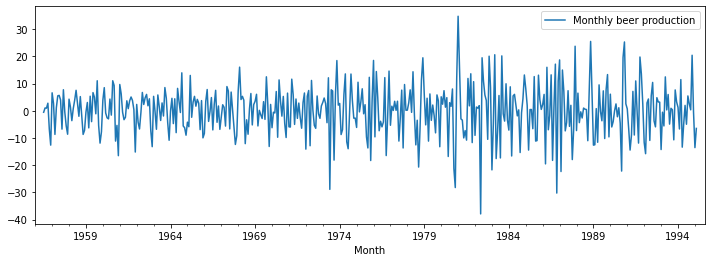

In [100]:
decomp.resid.plot(figsize=(12, 4))
plt.show()

Em outras palavras, uma série temporal \\(Z(t)\\) pode ser reconstruída atrvés de uma função que depende das componentes acima \\(f(T_t,S_t,\epsilon_t)\\). Uma série aditiva é representada por \\(Z(t)=T_t+C_t+\epsilon_t\\), equanto a multiplicativa é dada por \\(Z(t)=T_t \times S_t \times \epsilon_t\\)

## 8.4. Estacionariedade

Ao se desenvolver um modelo preditivo de séries temporais, uma das suposições mais frequentes a respeito de uma série temporal é a de que ela é estacionária, ou seja, que se desenvolve ao longo do tempo de forma aleatória em torno de uma média constante, refletindo estabilidade. Entretanto, a maioria das séries que encontramos no dia-a-dia apresentam alguma forma de não-estacionariedade, como no caso dos nossos dados de produção mensal de cerveja.

Como a maioria dos procedimentos de análise estatística de séries temporais supõem que estas sejam estacionárias é comum realizar transformações nos dados originais para torna-los estacionários. A transformação mais usada é a da **diferenças sucessivas**. A primeira diferença de uma série \\(Z(t)\\), em que \\(t\\) é a variável de tempo, é definida por:

\\[ \Delta Z(t) = Z(t) - Z(t-1) \\]

De modo geral, a n-ésima diferência de $Z(t)$ é

\\[ \Delta^n Z(t) =  \Delta[\Delta^{n-1} Z(t)] \\]

O pandas possui o método shift que desloca o índice pelo número desejado de períodos. No do método das diferenças sucessivas, utilizamos o parâmetro period=1.

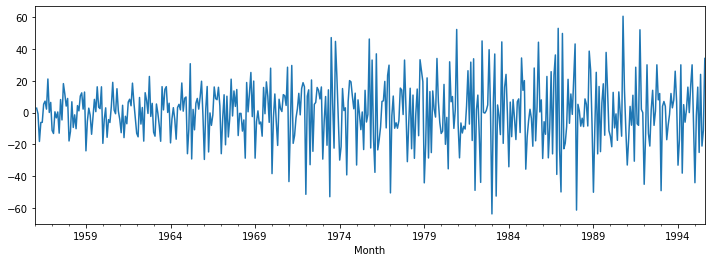

In [111]:
(df['Monthly beer production'] - df['Monthly beer production'].shift(periods=1)).plot(figsize=(12, 4))
plt.show()

## 8.5. Autocorrelação

No estudo de uma série temporal é importante entender a relação entre as observações atuais e as anteriores. Uma forma de realizar esta avaliação é através das funções de autocorrelação. Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo. Em outras palavras, descreve como o valor presente da série está relacionado aos valores passados, chamados de **lags**.

Dadas as medições, $Y_1, Y_2, \cdots, Y_N$ no tempo $X_1, X_2, \cdots, X_N$, a função de autocorrelação de lag k é definida como

$$r_k = \frac{\sum_{i=1}^{N-k} (Y_i - \overline{Y})(Y_{i+k} - \overline{Y})}{\sum_{i=1}^{N} (Y_i - \overline{Y})^2}$$

N é o número de amostras da série temporal

O coeficiente de autocorrelação é um número entre -1 e 1 que descreve uma autocorrelação negativa ou positiva, respectivamente. Um valor de zero indica nenhuma correlação.

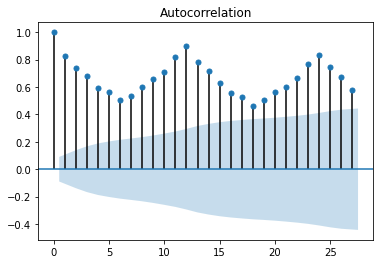

In [120]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df);

A execução do exemplo cria um gráfico 2D mostrando o valor de lag ao longo do eixo x e a correlação no eixo y entre -1 e 1. Os intervalos de confiança são desenhados como um cone. Por padrão, é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desse cone são muito provavelmente uma correlação e não um acaso estatístico.

## 8.6. Modelos Preditivos

Os métodos para previsão de séries temporais baseiam-se na extrapolação de características de observações passadas e no inter-relacionamento entre essas observações, fornecendo previsões acuradas se o futuro apresentar comportamento similar ao passado. 

Uma série temporal pode ser expressada da seguinte forma
\\[ Z(t) = f(t) + a_t \\]



### 8.6.1 Modelo Autoregressivo (AR)

Em um modelo de regressão múltipla, prevemos a variável de interesse usando uma combinação linear de preditores. Em um modelo de autorregressão, prevemos a variável de interesse usando uma combinação linear de valores passados da variável. O termo autoregressão indica que é uma regressão da variável contra ela mesma.

Um **modelo autorregresivo de ordem p** AR(p) pode ser escrito da seguinte forma:

\\[ z_t = c + \phi z_{t-1} + \phi z_{t-2} + \cdots + \phi z_{t-p} + \epsilon_t \\]


### 8.6.2 Modelo Médias Móveis (MA)

Processo de média móvel (MA), um processo em que o valor presente da série é definido como uma combinação linear de **erros** passados. Assumimos que os erros sejam distribuídos independentemente com a distribuição normal. O processo MA da ordem q é definido como,

\\[z_t = c + \epsilon_t + \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + \cdots + \Theta_q \epsilon_{t-q}\\]



Um modelo que junta os dois modelos visto anteriormente é o ARMA, que é implementado na biblioteca Statsmodels do Python.

In [136]:
history = df.loc['1957-01':'1960-01']['Monthly beer production']
real = df.loc['1960-02']['Monthly beer production']

#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(history, order=(5,0,0),freq='MS')
model_fit = model.fit()
previsao = model_fit.forecast()

print(f'Valor real: {real.values}')
print(f'Valor previsto: {previsao[0]}')

Valor real: [93.]
Valor previsto: [91.65026792]


Referências:

* https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime
* [DOC Seaonal Decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)
*[DOC plot_acf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)
*[DOC ARIMA](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html)